<a href="https://colab.research.google.com/github/JGuerrero08/Integraci-n-de-Datos-y-Prospectiva/blob/main/Caracterizaci%C3%B3n_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Riesgo Operacional** - EVERGREEN
En este espacio de trabajo, se plantea cómo caso de estudio, el analisis de los riesgos asociados a las opercaiones del negocio de las Naviera Evergree. Esta Naviera opera en 240 puertos al rededor del mundo utilizando 150 buques por el canal de Panamá.
Los riesgos a los cuales estan expuestas la Naviera estan relacionados con la lógistica portuaria, frente a la carag y descarga de contenedores. De esta manera este riesgo operacional se describe a través de 2 variables:
* Frecuencia: Indica el número de contenedores que se quedan en Tierra por semana (Tiempo).
* Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.
Es importante mencionar que el producto entre la severtidad y la frecuencia da como resultado la distribución de las pérdidas y es precisamente que se hará la caracterización de estra distribución utilizando las medidas de tendencia central (Media y Desviación) y las medidas de dispersión (Coeficiente de asimetría, Kurtosis).



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns     #Esta libreria para el trabajo estadistico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
nxl="/content/drive/MyDrive/Integración de Datos/Base de Datos/1. RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)




,Semana,Transacción Mensuales (Mes),Valor Transado (MUSD),Eventos (Mes),Severidad (KUSD),Riesgo
0,1,44,27.145501,4,2.867141,Riesgo de Error en Reportes No Críticos
1,2,194,68.447342,20,6.420941,Riesgo Regulatorio
2,3,217,20.111928,22,2.174181,Riesgo de Error en Reportes No Críticos
3,4,278,60.008094,28,5.816689,Riesgo Logístico y de Cadena de Suministro
4,5,286,63.007004,31,6.375786,Riesgo Regulatorio
5,6,164,11.047362,15,1.151032,Riesgo de Equipamiento Secundario
6,7,47,11.794715,5,1.293013,Riesgo de Equipamiento Secundario
7,8,366,697.729253,36,65.072471,Riesgo Ambiental
8,9,39,117.075199,4,12.138389,Riesgo de Imagen Corporativa
9,10,301,16.822844,32,1.645884,Riesgo de Equipamiento Secundario


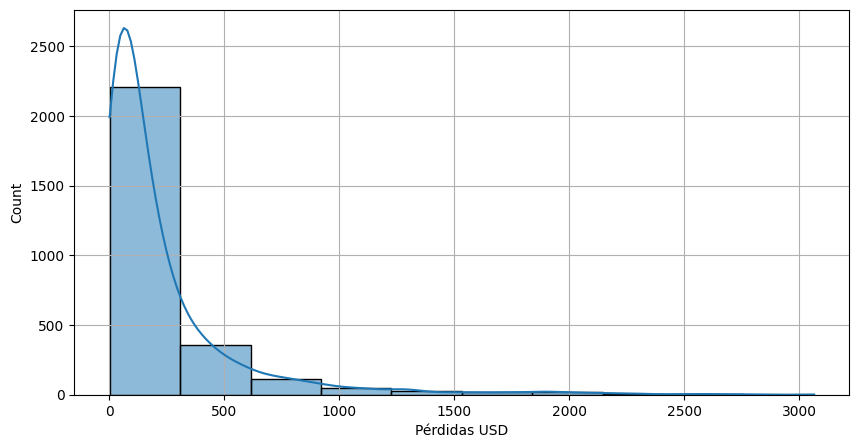

,Media,Varianza,Desviación,Asimetría,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


In [28]:
#Procedemos con la construcción de la distribución agregada de las peérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA =Freq*Sev



#Procedemos con el método de las variables aleatorias de Frecuencia, Severidad y LDA
p1,p2,p3,p4,p5 = Caracterizacion_VA(LDA)
Tbp = np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviación','Asimetría','Kurtosis'])
dfp.index=['LDA']
display(dfp)


In [24]:
dfp.head()

,Media,Varianza,Desviación,Asimetría,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


1.5 Se crea el método para la caracterización de Variables Aleatorias (Frecuencia, Severidad, Distribución de las pérdidas)


In [26]:
#Para crear un método de caracterización de Variables
def Caracterizacion_VA(X): #Recibe una variable

  plt.figure(figsize=(10,5))
  sns.histplot(X,bins=10,kde=True)
  plt.xlabel('Pérdidas USD')
  plt.grid()    #Mostrar cuadricula
  plt.show()

  NI = 10  #Indica el número de Clusters
  counts, bin_edges=np.histogram(X,bins=NI)
  XC = (bin_edges[:-1]+ bin_edges[1:])/2
  prob = counts/np.sum(counts)

  ## Calculamos los valores de tendencia central
  u=np.sum(XC*prob)
  var=np.sum((XC-u)**2*prob)
  sigma=np.sqrt(var)
  Cas=np.sum(prob*(XC-u)**3)/sigma**3
  Kur=(np.sum(prob*(XC-u)**4)/sigma**4)-3

  return u, var, sigma, Cas, Kur    # Propiedades del método



*2*. Se procede con la Clusterización estadistica. La clusterización estadistica esta definida por el histograma de Frecuencia


In [12]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
NI = 10  #Indica el número de Clusters
counts, bin_edges=np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC = (bin_edges[:-1]+ bin_edges[1:])/2
print("Los intervalos centrales:")
print(XC)
prob = counts/np.sum(counts)
print("Las probabilidades de cada intervalo:")
print(prob)

# Medidas de tendencia y distribución
u=np.sum(XC*prob)
print("La media es:", u)
var=np.sum((XC-u)**2*prob)
print("La varianza es:", var)
sigma=np.sqrt(var)
print("La desviación es:", sigma)


Cas=np.sum(prob*(XC-u)**3)/sigma**3
print("El coeficiente de asimetría es:", Cas)
Kur=(np.sum(prob*(XC-u)**4)/sigma**4)-3
print("El coeficiente de curtosis es:", Kur)

#Se configura la tabla de los datos
Tabla =np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts,prob))
df=pd.DataFrame(Tabla,columns=['Inf','Sup','Cent','Frecuencia', 'Proba'])
df


El número de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.6   308.93  615.26  921.59 1227.92 1534.25 1840.58 2146.91 2453.24
 2759.57]
Los intervalos superiores:
[ 308.93  615.26  921.59 1227.92 1534.25 1840.58 2146.91 2453.24 2759.57
 3065.9 ]
Los intervalos centrales:
[ 155.76  462.09  768.42 1074.76 1381.09 1687.42 1993.75 2300.08 2606.41
 2912.74]
Las probabilidades de cada intervalo:
[0.79 0.13 0.04 0.02 0.01 0.01 0.01 0.   0.   0.  ]
La media es: 279.6510949925361
La varianza es: 102317.97222569383
La desviación es: 319.87180592495775
El coeficiente de asimetría es: 3.792311305904773
El coeficiente de curtosis es: 17.131316115151854


,Inf,Sup,Cent,Frecuencia,Proba
0,2.599197,308.929450,155.764324,2209.0,0.787803
1,308.929450,615.259703,462.094577,356.0,0.126961
2,615.259703,921.589957,768.424830,116.0,0.041369
3,921.589957,1227.920210,1074.755083,46.0,0.016405
4,1227.920210,1534.250463,1381.085337,27.0,0.009629
5,1534.250463,1840.580717,1687.415590,18.0,0.006419
6,1840.580717,2146.910970,1993.745843,20.0,0.007133
7,2146.910970,2453.241223,2300.076097,7.0,0.002496
8,2453.241223,2759.571476,2606.406350,4.0,0.001427
9,2759.571476,3065.901730,2912.736603,1.0,0.000357


Se calculan las métricas estadísticas de tendencia central y dispersión
- Media
- Desviación
- Asimetría
- Kurtosis


In [5]:
#La media
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)
Tabla2 =np.column_stack((u,var,sigma))
df2=pd.DataFrame(Tabla2,columns=['Media','Varianza','Desviación'])
df2


,Media,Varianza,Desviación
0,231.266602,115581.511672,339.97281


In [6]:
from scipy.stats import skew, kurtosis

# Calculate Skewness and Kurtosis
SK = skew(LDA)
KUR = kurtosis(LDA)

# Create a DataFrame to display the results
df2_temp = df2.copy()
df2_temp['Asimetría'] = SK
df2_temp['Kurtosis'] = KUR

# Display the DataFrame
display(df2_temp)

,Media,Varianza,Desviación,Asimetría,Kurtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


2. Método de Montecarlo, es un método que utiliza una ruleta cargada, dependiendo de las probabilidades que genera el histograma


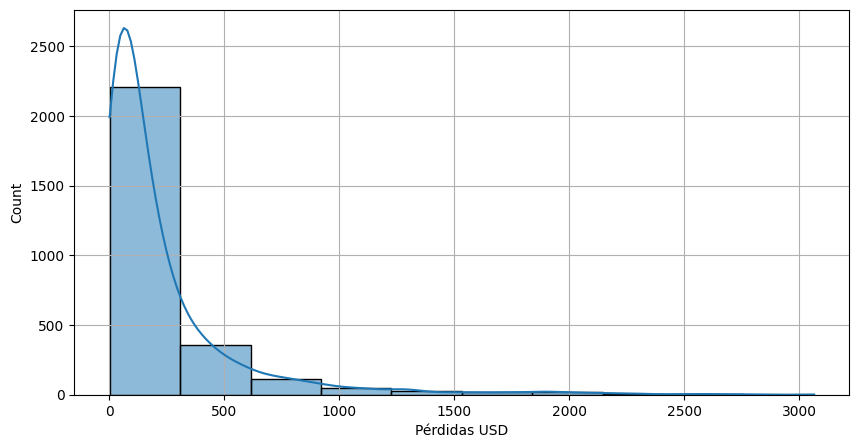

,Media,Varianza,Desviación,Asimetría,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


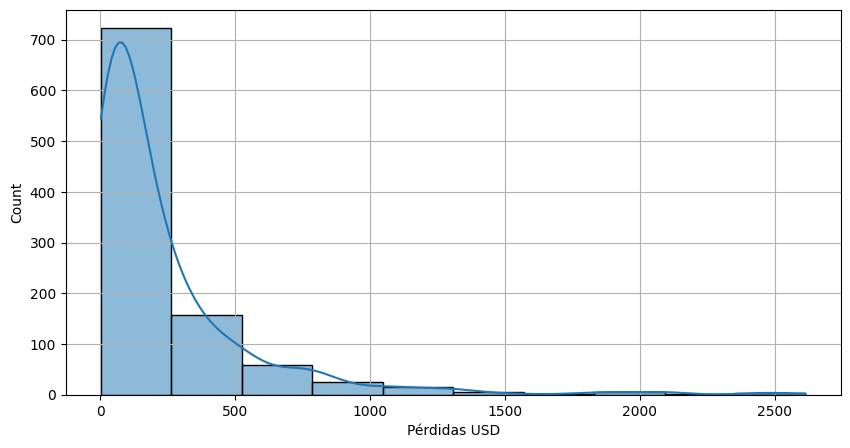

,Media,Varianza,Desviación,Asimetría,Kurtosis
LDAm,275.814085,103285.166099,321.380096,3.580581,16.116953


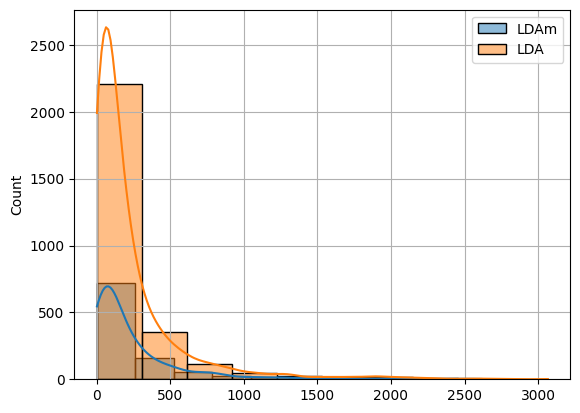

In [32]:
LDAm = LDA.sample(n=1000, replace = True)

# Probamos la variable antes
p1,p2,p3,p4,p5 = Caracterizacion_VA(LDA)  #Antes - con la variable original
Tbp = np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviación','Asimetría','Kurtosis'])
dfp.index=['LDA']
display(dfp)
#Probamos con la variable despues
p1m,p2m,p3m,p4m,p5m = Caracterizacion_VA(LDAm)
Tbp = np.column_stack((p1m,p2m,p3m,p4m,p5m))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviación','Asimetría','Kurtosis'])
dfp.index=['LDAm']
display(dfp)

plt.figure()
sns.histplot(LDAm,bins=10,kde=True, label='LDAm')
sns.histplot(LDA,bins=10,kde=True, label='LDA')
plt.grid()
plt.legend()
plt.show()

**Análisis de Resultados**

De lás metricas sw tendencia central y dispersión, podemos observar que los datos tiene la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetría (3.3890), el cual esta por encima de la unidad, lo que indica que en general las pérdidas por dejar contenedores en Tierra son pérdidas menores (Pérdidas esperadas - no asegurables).

por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado de la izquierda de la media de la distribución de las pérdidas, tal y como se puede observar en la gráfica del histograma de frecuencias. Esto refuerza la idea de menores pérdidas.




